<a href="https://colab.research.google.com/github/sanjay0geddati/Fundamental/blob/main/Ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**


In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

# **Import Data**

In [7]:
from sklearn.datasets import load_digits

In [8]:
df = load_digits()

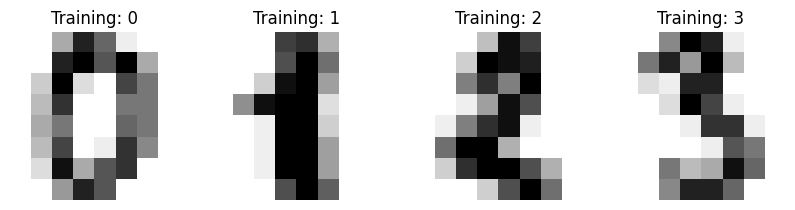

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

# **Data Preprocessing**

Flatten Image

In [12]:
df.images.shape

(1797, 8, 8)

In [13]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
df.images[0].shape

(8, 8)

In [16]:
len(df.images)

1797

In [18]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [19]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [20]:
data[0].shape

(64,)

In [21]:
data.shape

(1797, 64)

# **Scalingg Image Data**

In [22]:
data.min()

0.0

In [23]:
data.max()

16.0

In [25]:
data = data/16

In [26]:
data.min()

0.0

In [27]:
data.max()

1.0

In [28]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# **Predict Test Data**

In [40]:
y_pred = rf.predict(X_test)

In [41]:
y_pred

array([6, 7, 3, 5, 2, 3, 5, 6, 8, 6, 7, 9, 4, 1, 9, 6, 7, 7, 0, 8, 0, 4,
       0, 5, 3, 4, 4, 2, 8, 2, 7, 3, 4, 0, 3, 9, 5, 4, 6, 6, 1, 8, 7, 1,
       9, 9, 0, 8, 5, 9, 4, 9, 4, 9, 1, 8, 3, 7, 9, 9, 5, 2, 6, 5, 3, 0,
       2, 7, 8, 0, 2, 6, 1, 9, 8, 6, 9, 3, 7, 6, 0, 4, 3, 4, 0, 2, 3, 6,
       9, 6, 8, 8, 0, 4, 5, 5, 2, 9, 0, 5, 9, 6, 3, 9, 2, 5, 5, 6, 1, 6,
       7, 4, 1, 9, 6, 2, 5, 3, 3, 6, 7, 3, 1, 3, 8, 3, 5, 2, 1, 1, 3, 8,
       0, 6, 0, 2, 7, 0, 5, 8, 1, 4, 0, 6, 8, 9, 7, 6, 6, 9, 1, 5, 8, 7,
       3, 4, 8, 5, 4, 9, 7, 6, 3, 0, 1, 3, 7, 4, 1, 8, 6, 9, 2, 9, 7, 9,
       7, 4, 6, 9, 4, 0, 1, 2, 0, 2, 1, 9, 2, 2, 4, 7, 4, 1, 9, 8, 0, 1,
       4, 9, 1, 3, 6, 8, 3, 8, 6, 5, 1, 9, 5, 4, 9, 1, 4, 0, 3, 0, 1, 0,
       5, 9, 4, 3, 5, 4, 3, 6, 2, 9, 6, 4, 6, 4, 1, 0, 8, 0, 9, 1, 5, 3,
       6, 1, 3, 0, 4, 3, 1, 0, 8, 9, 4, 1, 6, 4, 3, 8, 1, 4, 8, 0, 6, 5,
       0, 0, 8, 6, 1, 2, 9, 9, 8, 1, 5, 6, 7, 9, 5, 7, 1, 4, 0, 4, 1, 4,
       4, 1, 1, 8, 6, 7, 7, 5, 6, 2, 8, 1, 0, 7, 4,

# **Model Accuracy**

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
confusion_matrix(y_test, y_pred)

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 55,  0,  1,  0,  2,  2,  1],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  2, 50,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  1, 58]])

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        60
           2       1.00      1.00      1.00        47
           3       0.98      0.89      0.93        62
           4       0.98      1.00      0.99        59
           5       0.94      0.96      0.95        47
           6       1.00      1.00      1.00        56
           7       0.92      1.00      0.96        44
           8       0.94      0.93      0.93        54
           9       0.95      0.94      0.94        62

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

